# 0-1 Knapsack problem

In [0]:
from collections import defaultdict

def knapsack(max_weight: int, values: list, weight: list) -> int:

  if len(values) != len(weight):
    raise AttributeError('Weight and values should be of equal size')

  # calls = [[0 for y in range(len(values))] for x in range(max_weight+1)]
  # countr = defaultdict(int)
  # tot = 0
  def max_value(index, remaining_weight):
    # nonlocal tot
    if index < 0 or remaining_weight <= 0:
      # tot += 1
      return 0
    # countr[(index, remaining_weight)] += 1
    if weight[index] > remaining_weight:
      return max_value(index-1, remaining_weight)
    else:
      return max(values[index] + max_value(index-1, remaining_weight-weight[index]), max_value(index-1, remaining_weight))
  
  x = max_value(len(values)-1, max_weight)
  # filled = sum(1 for x in range(max_weight+1) for y in range(len(values)) if calls[x][y] > 0)
  # total = sum(calls[x][y] for x in range(max_weight+1) for y in range(len(values)))
  # print(countr)
  print(len(countr.keys()), sum(countr.values()), tot)
  return x

In [0]:
print(knapsack(50, [1,2,2,2,2], [1,2,3,4,5]))

# Fenwick tree


- One based indexing
- Position of Least significant set (one) bit determines how many cells a cell is responsible for.
- E.g. - For index 12 -> 1100 => Position of set LSB = 3 (one based), no. of cells index 12 is responsible for = 2^(3-1) = 4

## Implementation 2
- O(n) construction
- O(log n) updates and sum queries
- Cannot add or remove elements


In [0]:
class FenwickTree:
  '''Still zero based array methods, but internal representation is one based'''
  def __init__(self, elements):
    if len(elements) == 0:
      raise ValueError('Length of elements cannot be zero')
    self.elements = [0, *elements]
    self._build_tree()

  @property
  def values(self):
    return self.elements[1:]
  
  @property
  def size(self):
    return self._actual_size -1
  
  @property
  def _actual_size(self):
    return len(self.elements)
  
  def _build_tree(self):
    '''For each element, update the immediate responsible parent; O(n)'''
    for index in range(1, self._actual_size):
      immediate_responsible = index + (index & (-index)) ## LSB(i) = i & (-i)
      if immediate_responsible < self._actual_size:
        self.elements[immediate_responsible] += self.elements[index]
  
  def add_value(self, index, value_to_add):
    index += 1
    if index >= self._actual_size:
      raise IndexError('Index out of bounds', index-1)
    while index < self._actual_size:
      self.elements[index] += value_to_add
      # update all responsible cells
      index += index & (-index)
  
  def sum_at_index(self, index):
    index += 1
    if index >= self._actual_size:
      raise IndexError('Index out of bounds', index-1)
    sum_ = 0
    while index > 0:
      sum_ += self.elements[index]
      index -= index & (-index) ## LSB(i) = i & (-i)
    return sum_

In [0]:
import random
import itertools

no_of_elements = 13
index, value = 6, 10

el = [random.randint(3, 80) for x in range(no_of_elements)]
elsum = list(itertools.accumulate(el))
fen = FenwickTree(el)
print('elements=', el)
print('sum =    ', elsum)
print('fenwick =', fen.values)
for i in range(no_of_elements):
  fs = fen.sum_at_index(i)
  if fs != elsum[i]:
    print('unequal at', i, fs, elsum[i])

print('Adding value', value, 'at index', index)
fen.add_value(index, value)
el[index]+=value
elsum = list(itertools.accumulate(el))
print('elements=', el)
print('fenwick =', fen.values)
print('sum =    ', elsum)

for i in range(no_of_elements):
  fs = fen.sum_at_index(i)
  if fs != elsum[i]:
    print('unequal at', i, fs, elsum[i])

## Implementation 1
- Method calls are zero based, instead of usual 1 based, working is still one based.
- Build tree is more complex and perhaps less efficient.
- Instead of updating the immediate parent, each element checks all the indexes it is responsible for.

In [0]:
'''
Implementation 1
Zero based, instead of usual one based
'''
class Fenwick:
  def __init__(self, elements):
    self.elements = elements
    # self.elements.insert(0, 0)
    self._build_tree()
  
  def _build_tree(self):
    for i in range(1, self.size+1):
      j = (i&(-i)) - 1
      # for j=1, while j < LSB(i), which is (i&(-i)), j= j*2
      while j:
        k= j&(-j)
        self.elements[i-1] += self.elements[i - k - 1]
        j &= (j-1)
    
  @property
  def size(self):
    return len(self.elements)
  
  def get_sum(self, index):
    result = 0
    j=index+1
    while j:
      result += self.elements[j-1]
      j &= (j-1)
    return result
  
  def add(self, index, value):
    i = index + 1 # zero based
    while i < self.size+1:
      self.elements[i-1] += value
      i += i & (-i)

In [0]:
import random
import itertools
el = [random.randint(3, 80) for x in range(16)]
print('elements=', el)
elsum = list(itertools.accumulate(el))
print('sum =    ', elsum)

fen = Fenwick(el.copy())
print('fenwick =', fen.elements)
for i in range(16):
  fs = fen.get_sum(i)
  if fs != elsum[i]:
    print('unequal at', i, fs, elsum[i])

fen.add(6, 10)
print('fenwick =', fen.elements)
el[6]+=10
elsum = list(itertools.accumulate(el))
print('sum =    ', elsum)

for i in range(16):
  fs = fen.get_sum(i)
  if fs != elsum[i]:
    print('unequal at', i, fs, elsum[i])

# Min heap

In [0]:
# MinHeap (a mix of min priority queue without decrease key)

class MinHeap:
  def __init__(self, array=[]):
    self.array = array
    self.buildMinHeap()
  
  @property
  def length(self):
    return len(self.array)
  
  def minHeapify(self, index):
    smallest = index
    left = 2*index +1
    right = 2*index +2
    if left < self.length and self.array[left] < self.array[smallest]:
      smallest = left
    if right < self.length and self.array[right] < self.array[smallest]:
      smallest = right
    if smallest != index:
      self.array[smallest], self.array[index] = self.array[index], self.array[smallest]
      self.minHeapify(smallest)
  
  def buildMinHeap(self):
    start = self.length//2 -1
    for i in range(start, -1, -1):
      self.minHeapify(i)
  
  def print(self):
    print(*(self.array))
  
  def insert(self, element):
    self.array.append(element)
    index = self.length-1
    parent = (index-1)//2
    while parent >= 0 and self.array[index] < self.array[parent]:
      self.array[parent], self.array[index] = self.array[index], self.array[parent]
      index = parent
      parent = (index-1)//2
  
  def extractMin(self):
    index = 0
    last = self.length - 1
    self.array[last], self.array[index] = self.array[index], self.array[last]
    element = self.array.pop()
    self.minHeapify(index)
    return element

mh = MinHeap([4, 5, 1, 6, 7, 3, 2])
mh.print()
mh.insert(0)
mh.print()
print(mh.extractMin())
mh.print()

# Union find

In [0]:
# Union find of integers
'''
For other types of elements, a hashtable can be used to map elements to integers.
This one simply unions first group to other. 
It can be changed to be based on size of components (merging smallr into larger, 
keeping track of size of components), or based on 'longest path'.
'''

# Using path compression
class UnionFind:
  def __init__(self, elements=[]):
    self.elements=dict(zip(elements, range(len(elements))))
    self.parent = list(range(len(elements)))
  
  def find(self, e):
    # j is root
    j = i = self.elements[e]
    while self.parent[j] != j:
      j=self.parent[j]
    
    # path compression
    while self.parent[i] != i:
      parent = self.parent[i]
      self.parent[i] = j
      i = parent
    
    return j

  def union(self, e1, e2):
    i1, i2 = self.find(e1), self.find(e2)
    self.parent[i2] = i1
    return i1


In [0]:
%%timeit
el = UnionFind(['a', 'b', 'c', 'd', 'e', 'f'])
el.union('a', 'b')
el.union('c', 'd')
el.union('b', 'd')
el.find('d') == el.find('a') == el.find('c')

# BST

In [0]:
# does not allow duplicates

class Node:
  def __init__(self, value):
    self.value = value
    self.left = None
    self.right = None

class BST:

  def __init__(self, elements=[], root=None):
    self.root=None
    if root is not None:
      self.insert(root)
    for x in elements:
      self.insert(x)

  def find(self, value):

    def _find(value, root):
      if root is None:
        return None
      if value == root.value:
        return root
      elif value < root.value:
        return _find(value, root.left)
      else:
        return _find(value, root.right)
    
    return _find(value, self.root)
  
  def insert(self, value):
    if self.root is None:
      self.root = Node(value)
      return self.root
    else:
      start = self.root
      while True:
        if value == start.value:
          return start
        if value < start.value:
          if start.left is not None:
            start = start.left
          else:
            start.left = Node(value)
            return start.left
        if value > start.value:
          if start.right is not None:
            start = start.right
          else:
            start.right = Node(value)
            return start.right

  def remove(self, value):

    # get parent node of already existing value
    def get_parent(value, root):
      if root is None:
        raise TypeError('root: expected Node, found None')
      if root.value == value:
        return None
      if root.left.value == value or root.right.value == value:
        return root
      else:
        if value < root.value:
          return get_parent(value, root.left)
        else:
          return get_parent(value, root.right)

    node = self.find(value)
    if node is None:
      raise ValueError(f'{value} not found in the BST')
    
    # No children or one child
    if node.left is None or node.right is None:
      parent = get_parent(node.value, self.root)
      if parent is None:
        self.root = None # tree is empty now
      if parent.left.value == node.value:
        parent.left = (node.left if node.left is not None else node.right)
      else:
        parent.right = (node.left if node.left is not None else node.right)
    # two children
    else:
      successor = node.right
      while successor.left is not None:
        successor = successor.left
      successorvalue = successor.value
      self.remove(successorvalue)
      node.value = successorvalue
    return Node(value)

  def inorder(self):
    
    def _inorder(root):
      if root is None:
        return  
      _inorder(root.left)
      print(root.value, end=' ')
      _inorder(root.right)

    _inorder(self.root)
    print('')

  def preorder(self):
  
    def _preorder(root):
      if root is None:
        return  
      print(root.value, end=' ')
      _preorder(root.left)
      _preorder(root.right)

    _preorder(self.root)
    print('')

In [0]:
b = BST([5, 6, 3, 2, 4, 9])
b.inorder()
b.insert(5.5)
b.inorder()
b.insert(1)
b.inorder()
b.remove(9)
b.preorder()
b.inorder()
b.remove(2)
b.preorder()
b.inorder()


# Extended Euclid's Algorithm

In [0]:
def eeuclid(a, b):
'''
Given two numbers a and b, eecuclid returns g, x and y such that -
  g = ax + by
If we give b and (a%b) instead, eeuclid would return g', x' and y' such that -
  g' = bx' + (a%b)y'
But g=g' (how?), so comparing -
  g = bx' + (a%b)y'
    = bx' + (a - b(a//b))y'
    = ay' + b(x' - (a//b)y')

Since coefficients are same as in ax + by -
  x = y'
  y = (x' - (a//b)y')
'''
  if b==0:
    return (a, 1, 0)
  else:
    g, x, y = eeuclid(b, a%b)
    return (g, y, x - y*(a//b))

In [0]:
import random
import sys

for x in range(50):
  a, b = random.randint(3, 10000), random.randint(3, 10000)
  gcd, x, y = eeuclid(a, b)
  if (a*x) + (b*y) != gcd:
    print(f'a={a} b={b} x={x} y={y} gcd={gcd} ax+by={a*x + b*y}')

# More information

### Links
- [YouTube video 1](https://www.youtube.com/watch?v=RBSGKlAvoiM)
- [YouTube video 2](https://www.youtube.com/watch?v=09_LlHjoEiY)
- [William Fiset's github repo](https://github.com/williamfiset/algorithms)



### Shortest path algorithms comparison

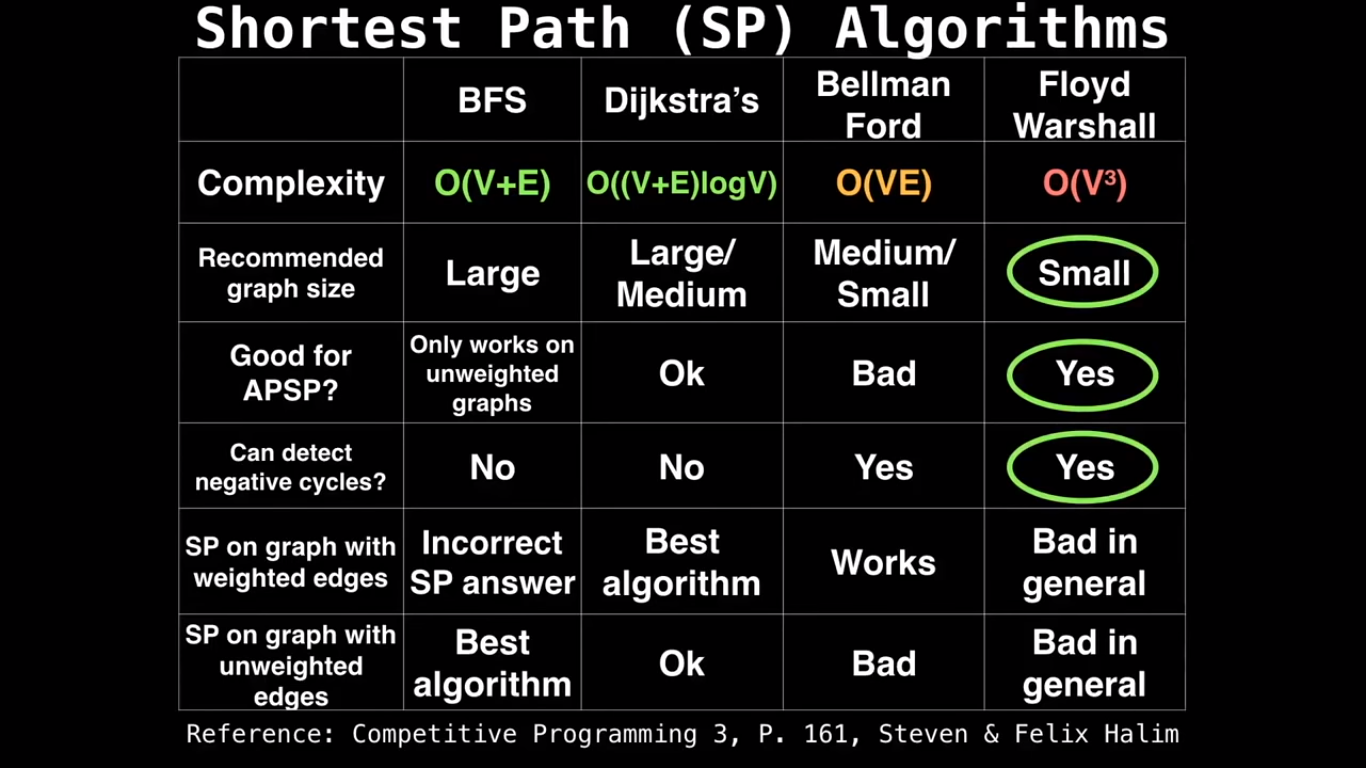